In [119]:
# Importing all the important libraries for the analysis. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import os

from array import array

In [120]:
# Importing all the important datasets for the analysis.

# Datasets of India
ind_agriPrac = 'Datasets/ind_AgriculturalPracticesDatasets_verified.csv'
ind_clmtWthr = 'Datasets/'
ind_plcyTrds = 'Datasets/'
ind_riceProd = 'Datasets/'
ind_soilChrs = 'Datasets/'
ind_socioEco = 'Datasets/'
ind_popltion = 'Datasets/ind_population.csv'

# Datasets of Philippines
phi_agriPrac = 'Datasets/phi_AgriculturalPracticesDatasets_verified.csv'
phi_clmtWthr = 'Datasets/'
phi_plcyTrds = 'Datasets/'
phi_riceProd = 'Datasets/'
phi_soilChrs = 'Datasets/'
phi_socioEco = 'Datasets/'

In [121]:
# Reading and printing the datasets (.csv file format)

# India
in_rd_agriPr = ind_agriPrac
in_rd_clmtWt = ind_clmtWthr
in_rd_plcyTr = ind_plcyTrds
in_rd_ricePr = ind_riceProd
in_rd_soilCh = ind_soilChrs
in_rd_socioE = ind_socioEco
in_rd_popltn = ind_popltion

# Philippines
ph_rd_agriPr = phi_agriPrac
ph_rd_clmtWt = phi_clmtWthr
ph_rd_plcyTr = phi_plcyTrds
ph_rd_ricePr = phi_riceProd
ph_rd_soilCh = phi_soilChrs
ph_rd_socioE = phi_socioEco

In [122]:
# This dataset contains India's Agricultural Practice
dFIndAgriPrc = pd.read_csv(in_rd_agriPr)
dFIndPpltion = pd.read_csv(in_rd_popltn)

In [123]:
# Dropping the first four empty rows
dFIndPpltion = dFIndPpltion.drop(index = dFIndPpltion.index[:4])

# Renaming Header using for loop
arrHeader_01 = [
    'Data Source', 'World Development Indicators', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964'
    , '1965', '1966', '1967', '1968', '1968', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979'
    , '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994'
    , '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'
    , '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'
]

for index, arrValue in enumerate(dFIndPpltion.columns):
    dFIndPpltion = dFIndPpltion.rename(columns = {arrValue: arrHeader_01[index]})

# Dropping rows
dFIndPpltion = dFIndPpltion[(dFIndPpltion['Data Source'] == 'India') | (dFIndPpltion['Data Source'] == 'Philippines')]
cl_to_remove = ['Data Source', 'World Development Indicators', 'Indicator Name', 'Indicator Code']
new_dFIndPpl = dFIndPpltion.drop(columns = cl_to_remove)
new_dFIndPpl = new_dFIndPpl.iloc[:, :-1]
new_dFIndPpl = new_dFIndPpl.reset_index(drop=True)


In [124]:
ind_yrMentnd = dFIndAgriPrc['Crop_Year'].sort_values().unique()

ind_prodArry = array('f', [])
ind_popuArry = array('f', [])
ind_dateArry = array('i', [])
ind_normProd = array('f', [])

ind_emptDict = {}

for ln50_idx, ln50_val in dFIndAgriPrc['Production'].items():
    if ln50_val == None:
        dFIndAgriPrc.at[index, 'Production'] = 0

for ln51_val in ind_yrMentnd:
    ind_dateArry.append(ln51_val)
    in_prodTbl = dFIndAgriPrc.loc[dFIndAgriPrc['Crop_Year'] == ln51_val, 'Production'].sum()
    ind_prodArry.append(in_prodTbl)
    

for ln52_val in new_dFIndPpl.columns:
    column_data = new_dFIndPpl[ln52_val].iloc[0]
    ind_emptDict[ln52_val] = column_data


for key, value in ind_emptDict.items():
    int_key = int(key)
    
    if int_key in ind_dateArry:
        ind_popuArry.append(value)

ln53_idx = 0
for ln53_val in ind_dateArry:
    ln53_idx += 1
    
    nw_prdctn = ind_prodArry[ln53_idx - 1]
    nw_popltn = ind_popuArry[ln53_idx - 1]
    normalizd = nw_popltn/nw_prdctn
    
    
    if normalizd >= 10:
        ind_normProd.append(0.15)
    else:
        frmt_nrml = format(normalizd, ".2f")
        ind_normProd.append(float(frmt_nrml))
    


In [125]:
dFPhiAgriPrc = pd.read_csv(ph_rd_agriPr)
tempHolder_v = 0
phi_emptDict = {}
phi_emptDct1 = {}

phi_normProd = array('f', [])
phi_popuArry = array('f', [])
phi_prodArry = array('f', [])

# Dropping the first two columns
dFPhiAgriPrc = dFPhiAgriPrc.iloc[:, 2:]

for ln53_idx, ln53_val in enumerate(dFPhiAgriPrc.columns):
    for ln54_idx, ln54_val in dFPhiAgriPrc[ln53_val].items():
        if ln54_val == '..':
            data = dFPhiAgriPrc.at[ln54_idx, ln53_val] = 0

            
for ln55_idx, ln55_val in enumerate(dFPhiAgriPrc.columns):
    for ln56_idx, ln56_val in dFPhiAgriPrc[ln53_val].items():
        tempHolder_v += ln56_val
    phi_emptDict[ln55_val] = tempHolder_v

    
for ln56_val in new_dFIndPpl.columns:
    column_data = new_dFIndPpl[ln56_val].iloc[1]
    phi_emptDct1[ln56_val] = column_data
    
    
for ky1, ln57_val in phi_emptDct1.items():
    int_ky1 = int(ky1)
    
    if int_ky1 in ind_dateArry:
        phi_popuArry.append(ln57_val)

        
for ky2, ln59_val in phi_emptDict.items():
    int_ky2 = int(ky2)
    
    if int_ky2 in ind_dateArry:
        phi_prodArry.append(ln59_val)
        
        
ln58_idx = 0
for ln58_val in ind_dateArry:
    ln58_idx += 1
    
    nw_prdctn = phi_prodArry[ln58_idx - 1]
    nw_popltn = phi_popuArry[ln58_idx - 1]
    normalizd = nw_popltn/nw_prdctn
    
    frmt_nrml = format(normalizd, ".2f")
    phi_normProd.append(float(frmt_nrml))

    

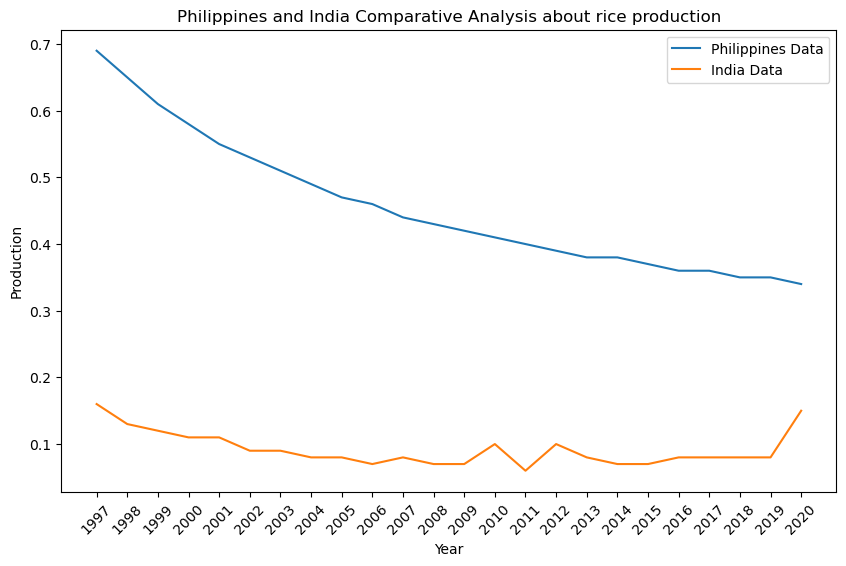

In [126]:
#displaying results
mpl.figure(figsize=(10, 6))

mpl.plot(ind_dateArry, phi_normProd, label='Philippines Data')
mpl.plot(ind_dateArry, ind_normProd, label='India Data')

mpl.xlabel('Year')
mpl.ylabel('Production')

mpl.title('Philippines and India Comparative Analysis about rice production')

mpl.xticks(ind_dateArry)
mpl.xticks(rotation=45)

mpl.legend()
mpl.show()

In [213]:
dFPhiAgriPrc = pd.read_csv(ph_rd_agriPr)
dFIndPpltion = pd.read_csv(in_rd_popltn)
arr_ln61_val = array('i', [])
arr_for_labl = []
arr_for_data = array('f', [])


state_number = dFPhiAgriPrc['Provinces'].unique()

new_phiAPrac = dFPhiAgriPrc.iloc[:, 1:]

for ln61_val in enumerate(new_phiAPrac.columns):
    if ln61_val[1] != 'Provinces':
        new_ln61_val = int(ln61_val[1])
        arr_ln61_val.append(new_ln61_val)
    
for state_val in state_number:
    keyword = state_val

    # Filter the DataFrame based on the keyword
    filtered_df = new_phiAPrac[new_phiAPrac['Provinces'] == keyword]
    
    # Get the sum horizontally across the matching rows
    sum_result = filtered_df.iloc[:, 1:].sum(axis=1)
    total_sum = sum_result.sum()

    # Print the total sum
    frmt_sumv = format(total_sum, ".2f")
    arr_for_labl.append(state_val)
    arr_for_data.append(float(frmt_sumv))



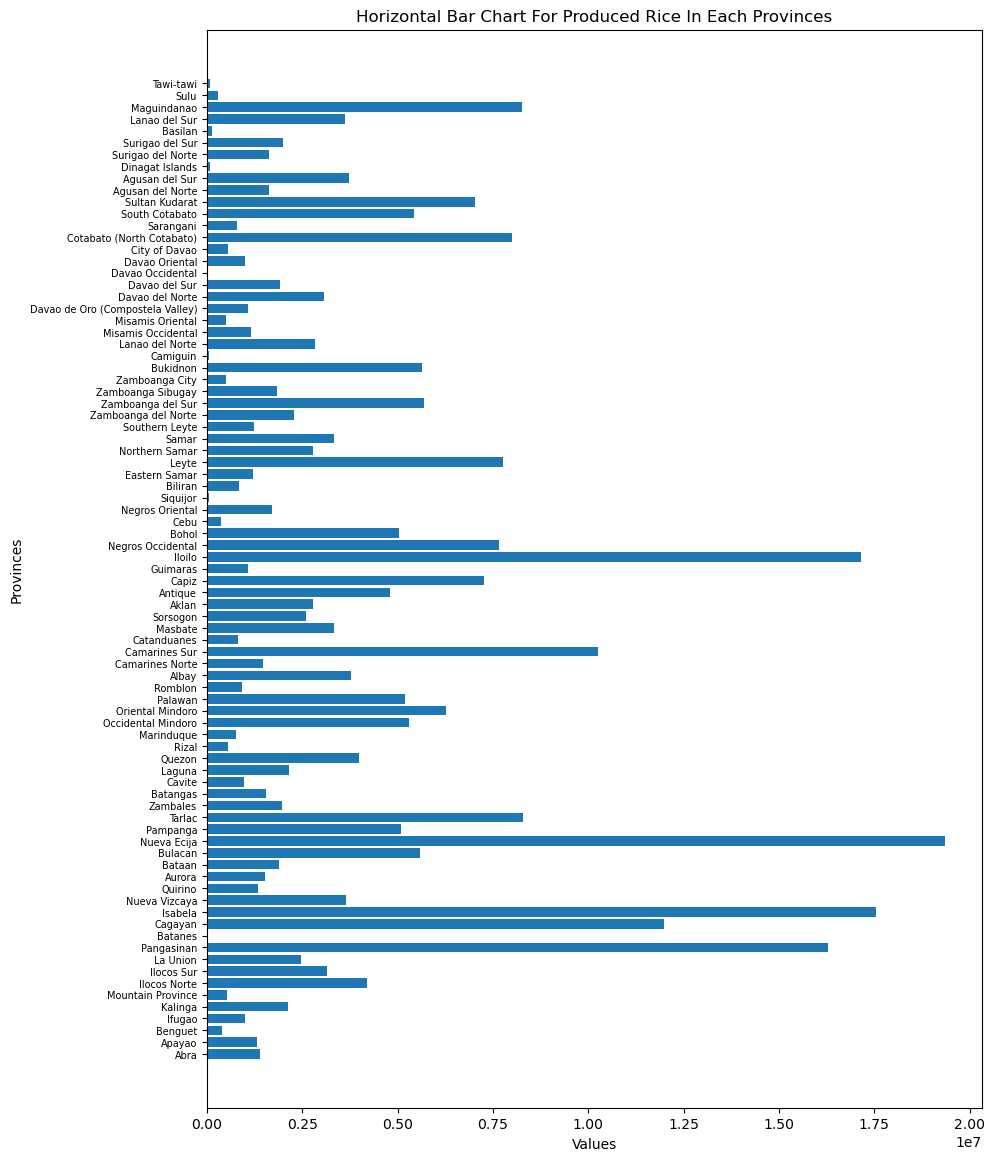

In [212]:
mpl.figure(figsize=(10, 14))

# Create the horizontal bar chart
mpl.barh(arr_for_labl, arr_for_data)


# Add labels and title
mpl.xlabel('Values')
mpl.ylabel('Provinces')
mpl.title('Horizontal Bar Chart For Produced Rice In Each Provinces')

# Adjust spacing between y-axis labels
mpl.tick_params(axis='y', labelsize=7)

# Show the chart
mpl.show()
